# Building Neural Network for Regression Problem 

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

## Objective :  To predict the house price using 8 predictor varriables

In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

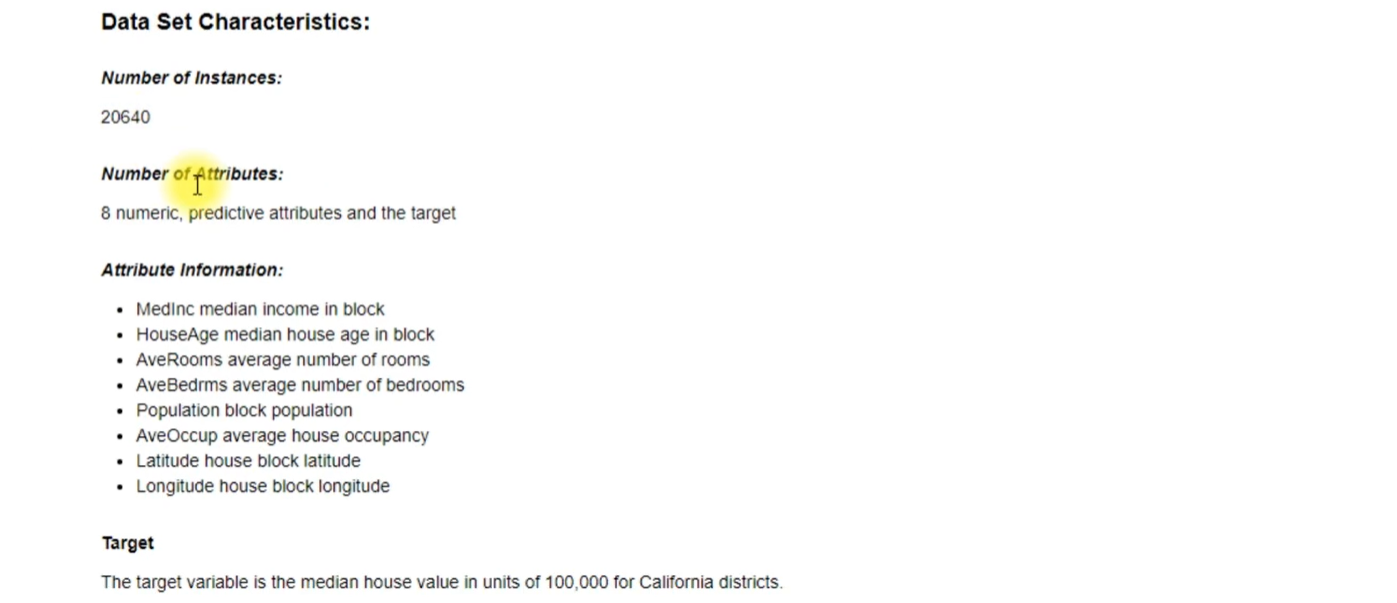

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [5]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [7]:
# Standardizing
# a process in which --> we subtract the mean of each varriable from there individual values and then
# also divided by the varriance --> becuase at the end we want all the varriables with mean as '0' and varriance as '1'

# standard procedure to create any ML Model

# scaler is trained on training dataset only becuase we do ot want information from test/valid set to influence model training

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
# fitting the scaler object on trainign data
X_train = scaler.fit_transform(X_train) # scaler will find values to subtract as a mean and to divide as a varriance
X_valid = scaler.transform(X_valid) # transforming validation set using the sclaer object fitted on X_train
X_test = scaler.transform(X_test) # transforming test set using the sclaer object fitted on X_train

In [8]:
# to generate the same result everytime the code is being runned
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
X_train.shape

(11610, 8)

In [10]:
X_valid.shape, X_test.shape

((3870, 8), (5160, 8))

### Structure of Neural Network

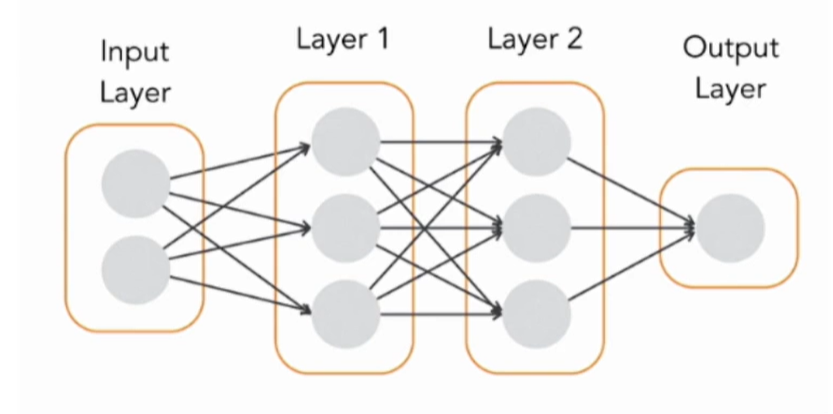

In [11]:
# input layer
# first dense layer with 30 neurons
# second dense layer with another 30 neurons
# as this is a regression pblm --> single output neuron without any activation function --> single neuron as want
# continuous value as output

In [13]:
# Sequential API

model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]), #first_layer
    keras.layers.Dense(30,activation="relu"), # second_layer
    keras.layers.Dense(1)]) #output_layer

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compiling the model

model.compile(loss="mean_squared_error", # square of the difference of predicted value & actual value
              optimizer=keras.optimizers.SGD(lr=1e-3), # learnign rate --> lr - default value=0.01
              metrics=["mae"]) # mean_absolute_error = difference between the predicted value and actual value

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [16]:
# training the model

model_history = model.fit(X_train,y_train, epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 2s 1ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/20
363/363 [==============================] - 0s 895us/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/20
363/363 [==============================] - 0s 924us/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/20
363/363 [==============================] - 0s 916us/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/20
363/363 [==============================] - 0s 928us/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/20
363/363 [==============================] - 0s 927us/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/20
363/363 [==============================] - 0s 918us/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/20
363/363 [==============================] - 0s 924us/s

In [17]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577126979827881,
  0.593418538570404,
  0.5557191371917725,
  0.5271905064582825,
  0.5032975673675537,
  0.48535558581352234,
  0.47091811895370483,
  0.45779937505722046,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.42605164647102356,
  0.42017653584480286,
  0.41549986600875854,
  0.41116511821746826,
  0.4077068567276001,
  0.40395283699035645,
  0.4004494547843933,
  0.39796027541160583],
 'mae': [0.9900256991386414,
  0.6041509509086609,
  0.5618005990982056,
  0.5398454070091248,
  0.5237293243408203,
  0.5112562775611877,
  0.5010154247283936,
  0.492448091506958,
  0.4857262969017029,
  0.4797375202178955,
  0.4744163453578949,
  0.4703480303287506,
  0.46740883588790894,
  0.4636021554470062,
  0.461266428232193,
  0.4591343402862549,
  0.4568699896335602,
  0.4545365273952484,
  0.4521064758300781,
  0.45083147287368774],
 'val_loss': [0.7126054763793945,
  0.6880088448524475,
  0.5803285837173462,
  0.516608536243

In [18]:
# performance of the trained model

mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 993us/step - loss: 0.3942 - mae: 0.4502


In [19]:
# mse = 0.3942 
# mae = 0.4502

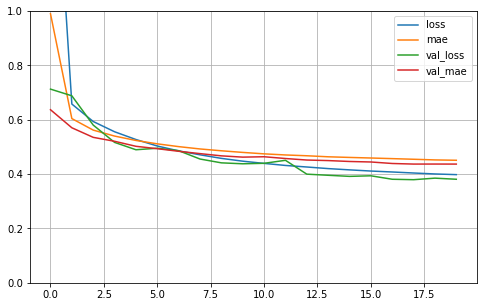

In [20]:
# plotting the model history

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [21]:
# the above graph is still going down means if run more number of epochs this will further decrase the losses and improve
# the accuracy of the model
# re-running the epoch code again means running epoch 20 more times and as keras always save the values of weights and biases
# hence the code will train the model from epoch 21....

In [22]:
# training the model again 20 more times

model_history = model.fit(X_train,y_train, epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3949 - mae: 0.4489 - val_loss: 0.3695 - val_mae: 0.4322
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3922 - mae: 0.4469 - val_loss: 0.3698 - val_mae: 0.4350
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3898 - mae: 0.4461 - val_loss: 0.3647 - val_mae: 0.4285
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3873 - mae: 0.4439 - val_loss: 0.3632 - val_mae: 0.4309
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3851 - mae: 0.4426 - val_loss: 0.3607 - val_mae: 0.4276
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3829 - mae: 0.4415 - val_loss: 0.3586 - val_mae: 0.4247
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3808 - mae: 0.4398 - val_loss: 0.3563 - val_mae: 0.4240
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.

In [23]:
# performance of the trained model -  again

mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3596 - mae: 0.4269


In [24]:
# earlier_mse = 0.3942 ; now_mse = 0.3596 
# earlier_mae = 0.4502 ; now_mae = 0.4269

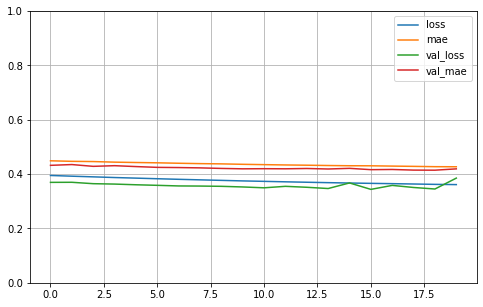

In [25]:
# plotting the model history

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [26]:
# the line has flattened --> means acheived the convergence on this model

### Predict values on new unseen-dataset

In [27]:
# as at present there is no unseen-dataset hence will be taking 3 rows from test dataset to verify

X_new = X_test[:3]

In [28]:
X_new

array([[-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
         0.38899735,  0.19374821,  0.2870474 ],
       [-0.7125531 ,  0.10880952, -0.16332973,  0.20164652,  0.12842117,
        -0.11818174, -0.23725261,  0.06215231],
       [-0.2156101 ,  1.8491895 , -0.57982788,  0.18528489, -0.10429403,
        -0.67694905,  1.00890193, -1.4271529 ]])

In [29]:
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[0.60721976]
 [1.8602647 ]
 [3.792632  ]]
[0.477   0.458   5.00001]


# Sequential API 

 - easy to use but not flexible
 - cannot create complex topologies where have multiple inputs or multiple outputs for that have to use Functional API
 
# Functional API

 - each layer is made as a function or like a building block of NN and can use these functions to create a complex structure by joining them according to our structure need.
 
 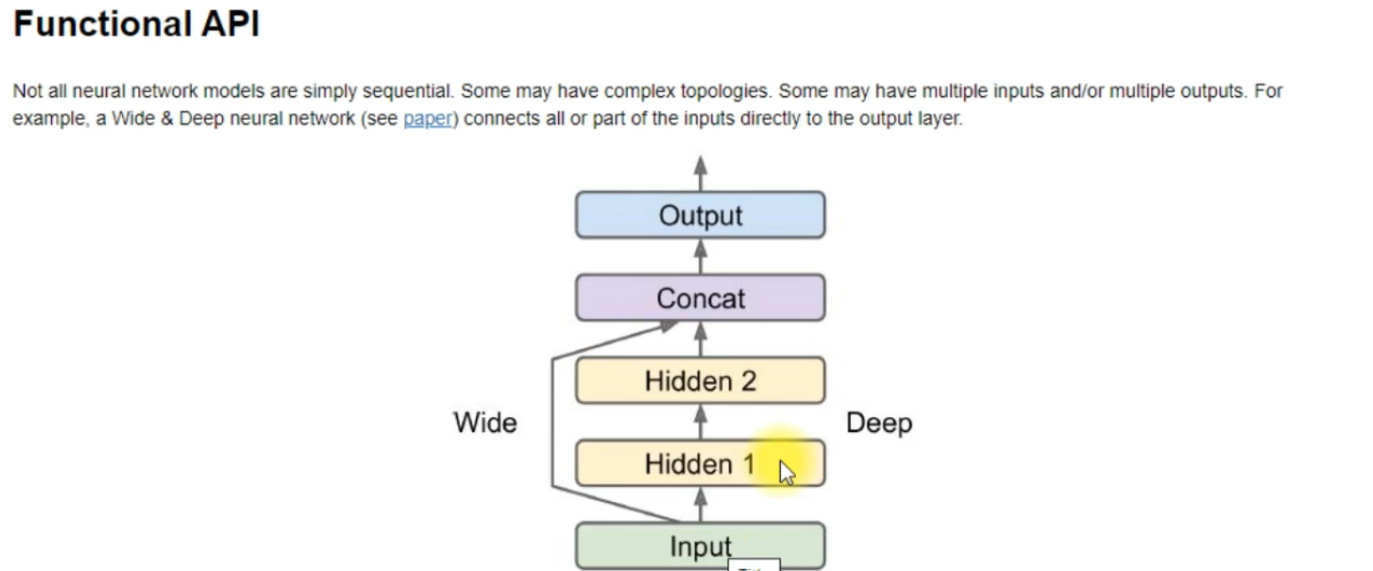

In [30]:
# now to use functional api have to delete the previous model and clear session of the keras as this will free up the 
# resources for next model training 

In [31]:
del model

In [32]:
keras.backend.clear_session()

In [33]:
# wide and deep neural network
# deep --> going through 2 dense layers and wide beacuse --> input is going to output directly as well

# so along with output of hidden layers it also connects all part of input directly to output
# this wide linkage not possible in Sequential API

# ADVANTAGE OF WIDE AND DEEP ARCHITECTURE -->
# makes possible for a neural network to learn both the deep patterns by deep linkage and simple rules by wide linkage

In [34]:
# input layer
input_ = keras.layers.Input(shape=X_train.shape[1:])
# dense layers
hidden1 = keras.layers.Dense(30, activation="relu")(input_) # here input is given in form of function hence functional api
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1) # input of hidden2 layer is hidden1 output
# concat layer
concat = keras.layers.concatenate([input_,hidden2])
# output layer
output = keras.layers.Dense(1)(concat)

# combine all layers and create model
model = keras.models.Model(inputs=[input_], outputs=[output])

In [35]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [36]:
# compile the model

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3),metrics=["mae"])

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [37]:
# fitting the model

model_history = model.fit(X_train,y_train, epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 11s 5ms/step - loss: 1.6920 - mae: 0.8893 - val_loss: 0.8798 - val_mae: 0.6026
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6836 - mae: 0.5994 - val_loss: 0.6420 - val_mae: 0.5764
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6265 - mae: 0.5775 - val_loss: 0.5891 - val_mae: 0.5503
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5877 - mae: 0.5581 - val_loss: 0.5455 - val_mae: 0.5343
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5566 - mae: 0.5421 - val_loss: 0.5409 - val_mae: 0.5202
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5312 - mae: 0.5298 - val_loss: 0.4903 - val_mae: 0.5046
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5108 - mae: 0.5186 - val_loss: 0.4728 - val_mae: 0.4962
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0

In [38]:
# fitting the model again for 20 more times

model_history = model.fit(X_train,y_train, epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4060 - mae: 0.4581 - val_loss: 0.4090 - val_mae: 0.4439
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4029 - mae: 0.4550 - val_loss: 0.4422 - val_mae: 0.4480
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4000 - mae: 0.4541 - val_loss: 0.4263 - val_mae: 0.4427
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3972 - mae: 0.4519 - val_loss: 0.4139 - val_mae: 0.4432
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3948 - mae: 0.4503 - val_loss: 0.4007 - val_mae: 0.4395
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3923 - mae: 0.4487 - val_loss: 0.4213 - val_mae: 0.4389
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3903 - mae: 0.4471 - val_loss: 0.3999 - val_mae: 0.4375
Epoch 8/20
363/363 [==============================] - 2s 4ms/step - loss: 0.

In [39]:
model.history.history

{'loss': [0.40599513053894043,
  0.40294942259788513,
  0.40002766251564026,
  0.3971847593784332,
  0.39482662081718445,
  0.39234665036201477,
  0.3902871906757355,
  0.3884373605251312,
  0.38649120926856995,
  0.38476675748825073,
  0.3833544850349426,
  0.38152745366096497,
  0.38031378388404846,
  0.3788323700428009,
  0.3774571418762207,
  0.3762756586074829,
  0.37505412101745605,
  0.37439072132110596,
  0.3728482723236084,
  0.37196919322013855],
 'mae': [0.4580846130847931,
  0.4550425410270691,
  0.4541080892086029,
  0.4518536627292633,
  0.4502573013305664,
  0.44865450263023376,
  0.4471110999584198,
  0.4459666907787323,
  0.44470107555389404,
  0.44360047578811646,
  0.4420853853225708,
  0.4410454332828522,
  0.4402518570423126,
  0.439010888338089,
  0.4385206699371338,
  0.4377359449863434,
  0.4367184638977051,
  0.436289519071579,
  0.4349154233932495,
  0.4344426691532135],
 'val_loss': [0.4090024530887604,
  0.4422057867050171,
  0.42629554867744446,
  0.4138856

In [40]:
# performance of the model

mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.3681 - mae: 0.4335


In [41]:
# mse = 0.3681 
# mae = 0.4335

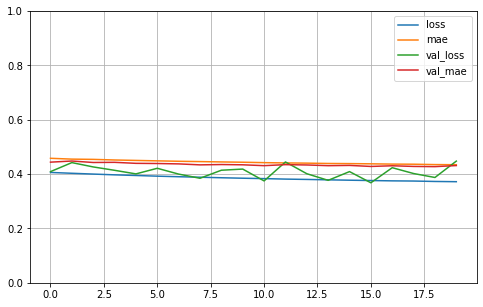

In [43]:
# plotting the model history

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [44]:
# the line has flattened --> means acheived the convergence on this model

# Saving and Restoring Model after training

 - model architecture and all the layers and hyperparameters and the value of all the hyperparameters for each layer i.e. baises and weights value
 - so instead of training the model each time we can inititate a new session and can just load the model which was previously saved to get all the details of that model

In [45]:
# saving model

model.save("Functional_api_model.h5")

In [46]:
# model saved in present workign directory
%pwd

'C:\\Users\\HP\\Downloads\\internshala - deep learning\\2. ANN'

In [47]:
# to change the working directory following command need to be used:

# %cd new directory path

In [48]:
# deleting model and keras 
del model

In [49]:
keras.backend.clear_session()

In [50]:
# calling the saved model
model = keras.models.load_model("Functional_api_model.h5")

In [51]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [52]:
y_pred = model.predict(X_new)
print(y_pred)

[[0.7934404]
 [1.7506483]
 [3.7681327]]


In [53]:
# sometimes the model need lot of hours to get trained in that case we can use 'callbacks' which save the model after each 
# epoch

# Using Callbacks during Training 

In [54]:
del model

In [55]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [56]:
# example of Sequential Model 2 dense layers having same number of neurons and 1 output layer
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]), 
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [57]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [58]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [59]:
history = model.fit(X_train,y_train,epochs=10, validation_data=(X_valid,y_valid), callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 863us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 876us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 835us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 950us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 896us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 948us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 875us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 0s 943us/step - loss: 0.4474 - 

In [60]:
# the above saved 10 model files for each 10 epoch after training the model

In [61]:
del model

In [63]:
keras.backend.clear_session()

In [64]:
model = keras.models.load_model("Model-10.h5")

In [65]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 576us/step - loss: 0.4382


0.43822863698005676

In [66]:
# there is also no need to save model at each epoch
# if using a validation set during a training we can save the best model only by creating a checkpoint call back
# which includes `save_best_only=True`
# and save that model only whose performance on validation set is best

# Best Model Only_Saving and Restoring

In [67]:
del model

In [68]:
keras.backend.clear_session()

In [69]:
np.random.seed(42)
tf.random.set_seed(42)

In [70]:
# example of Sequential Model 2 dense layers having same number of neurons and 1 output layer
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]), 
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [71]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [72]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only=True)

In [73]:
history = model.fit(X_train,y_train,epochs=10, validation_data=(X_valid,y_valid), callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 900us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 856us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 960us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 958us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 901us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 937us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 941us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 0s 903us/step - loss: 0.4474 - 

In [74]:
del model

In [75]:
keras.backend.clear_session()

In [76]:
model = keras.models.load_model("Best_Model.h5")

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 606us/step - loss: 0.4382


0.43822863698005676

In [79]:
# best way to train method is early stopping
# run the model for large number of epochs and will keep eye on validation set score
# so suppose after 60 epochs my validation set accuracy not improving then
# will stop the training at that point and will be using the model having best valdiation score so far

# another callback - early stopping call back along with checkpoint call back with save best only as True
# patience value = epoch value after which training will be interupted if there is not progress on validation set score

# means at epoch=53 we can see no improvement so keras will take patience of 10 epochs more and save epoch 63

In [80]:
del model

In [81]:
keras.backend.clear_session()

In [82]:
# example of Sequential Model 2 dense layers having same number of neurons and 1 output layer
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]), 
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [83]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [84]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_best_model.h5", save_best_only=True)

In [85]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [86]:
history = model.fit(X_train,y_train,epochs=200, validation_data=(X_valid,y_valid), 
                    callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 1s 1ms/step - loss: 1.4581 - val_loss: 0.7883
Epoch 2/200
363/363 [==============================] - 0s 906us/step - loss: 0.7368 - val_loss: 0.7306
Epoch 3/200
363/363 [==============================] - 0s 864us/step - loss: 0.6516 - val_loss: 0.6501
Epoch 4/200
363/363 [==============================] - 0s 931us/step - loss: 0.5951 - val_loss: 0.5551
Epoch 5/200
363/363 [==============================] - 0s 886us/step - loss: 0.5536 - val_loss: 0.5025
Epoch 6/200
363/363 [==============================] - 0s 864us/step - loss: 0.5199 - val_loss: 0.4728
Epoch 7/200
363/363 [==============================] - 0s 903us/step - loss: 0.4940 - val_loss: 0.4497
Epoch 8/200
363/363 [==============================] - 0s 883us/step - loss: 0.4730 - val_loss: 0.4359
Epoch 9/200
363/363 [==============================] - 0s 982us/step - loss: 0.4563 - val_loss: 0.4267
Epoch 10/200
363/363 [==============================] - 0s 932us/step - los

In [87]:
# as we can see training has stopped after 20 epochs
# this means there is no need to train it till 200 epoch value
# model has already converged and there is no weight to further decrase the validation loss

# best epoch value came at: Epoch 10/200
# 363/363 [==============================] - 0s 932us/step - loss: 0.4431 - val_loss: 0.4224

# after which keras waited for 10 epochs for improvement 

In [88]:
del model

In [89]:
keras.backend.clear_session()

In [90]:
model=keras.models.load_model("early_stop_best_model.h5")

In [91]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 638us/step - loss: 0.4366


0.43662846088409424

In [93]:
# early stop way is best way to optimize the performance of the model